(1344, 1344)
complete_image_new_colors.shape = (4032, 5376, 4)


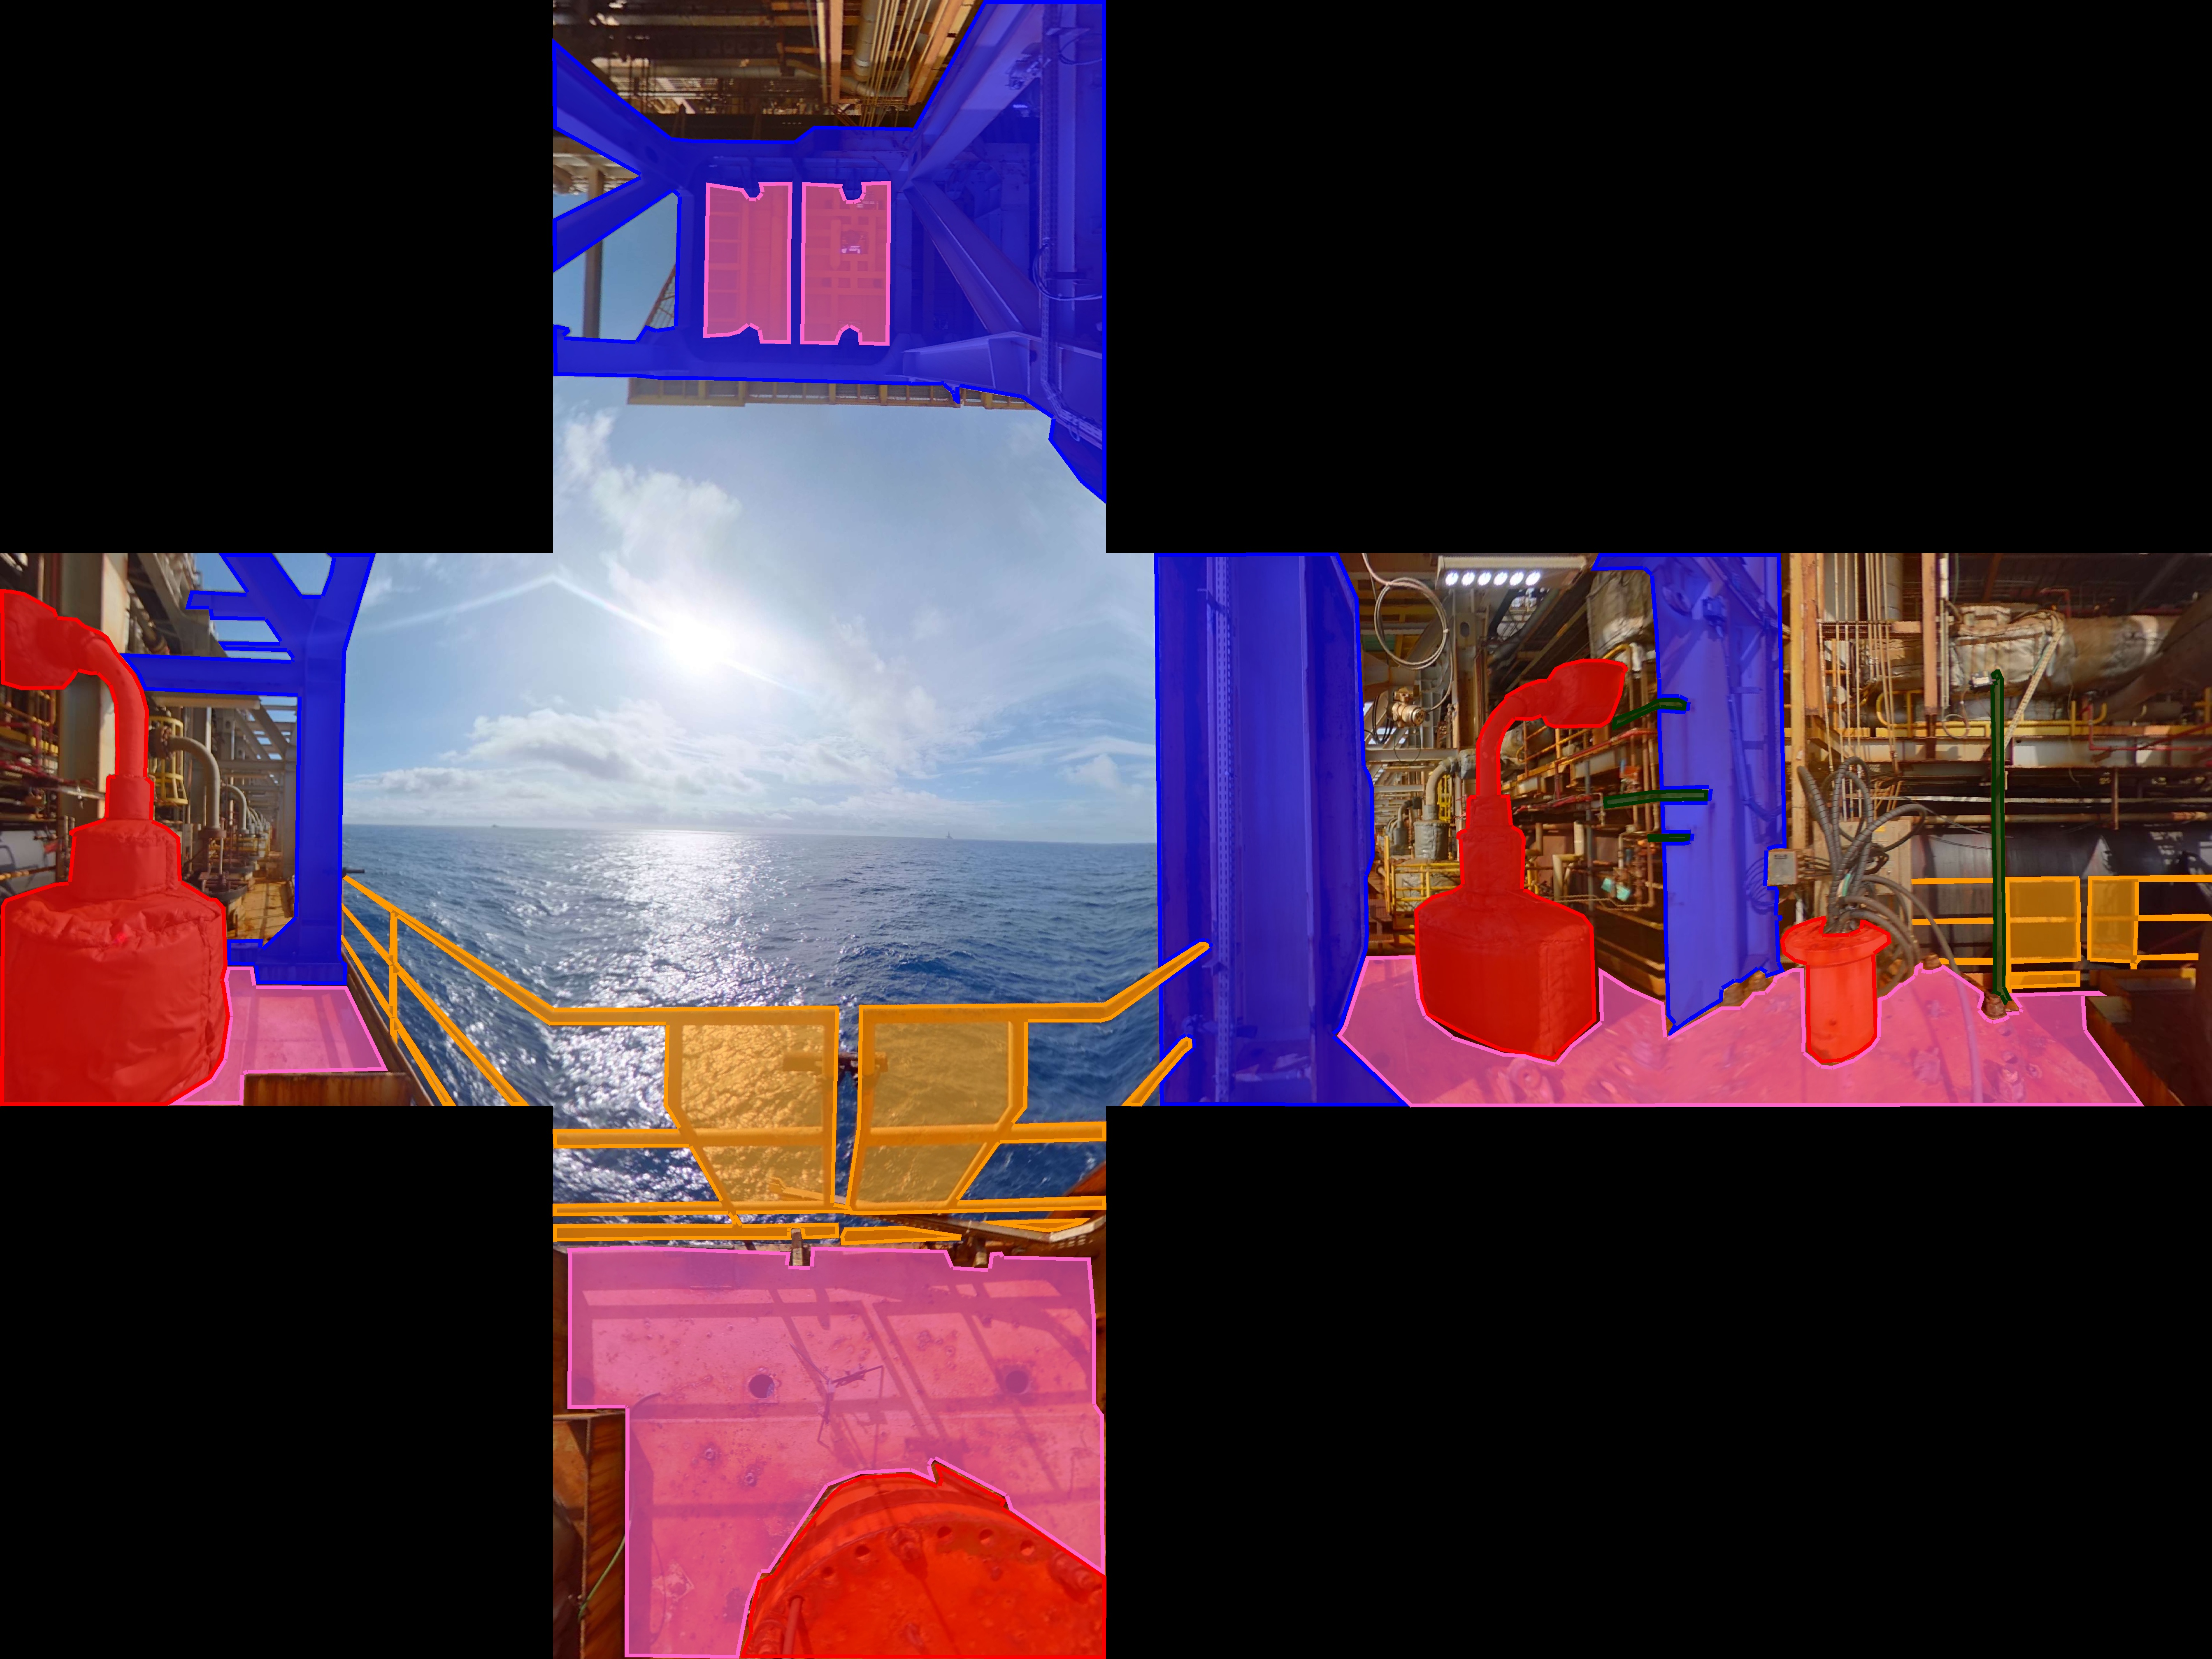

In [4]:

import cv2
import numpy as np
import json
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw
import IPython

def imshow(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret,width=1000,height=1000)
    IPython.display.display(i)

def classe_name_to_index(classe_name):
    classe_name = classe_name.lower()
    if classe_name == "tvf":
        return 0
    if classe_name == "teto":
        return 1
    if classe_name == "escadas":
        return 2
    if classe_name == "estruturas":
        return 3
    if classe_name == "equipamento" or classe_name == "equipamento.":
        return 4
    if classe_name == "guarda corpo":
        return 5
    if classe_name == "piso":
        return 6
    if classe_name == "suportes":
        return 7
    print(f"Classe {classe_name} nao suportada")
    return 0
    
# Load your RGB image
#label_path = 'datasets/darwin_export_test/labels/test/cubemap_P74_d31875d361c6cbcfbce07cf0ad147d8b_posy.txt'
#img_name = 'datasets/darwin_export_test/images/test/cubemap_P74_d31875d361c6cbcfbce07cf0ad147d8b_posy.png'
img_name = 'cubemap_P74_4c77848b1a7305097a6775016f6d0945'
img_name_posx = img_name+'_posx'
img_name_negx = img_name+'_negx'
img_name_posy = img_name+'_posy'
img_name_negy = img_name+'_negy'
img_name_posz = img_name+'_posz'
img_name_negz = img_name+'_negz'
face_path_list = [img_name_posx,img_name_negx,img_name_posy,img_name_negy,img_name_posz,img_name_negz]


one_face = Image.open(f"SISTEMAS_UFF/Images/{img_name_posx}.png")
width,height = one_face.size

complete_image = np.zeros((height*3,width*4,3))


if img_name.endswith("posx"):
    pass
elif img_name.endswith("negx"):
    pass
elif img_name.endswith("negy"):
    one_face = one_face.rotate(270)
    pass
elif img_name.endswith("posy"):
    one_face = one_face.rotate(90)
    pass
elif img_name.endswith("posz"):
    pass
elif img_name.endswith("negz"):
    pass

alpha_value_old = 77
alpha_value_new = 150
outline_width = 10

#             (    TVF,                              Teto,                     Escadas ,                 Estruturas,  
color_list = ((97,0,255,alpha_value_old),(143,255,0,alpha_value_old),(0,194,255,alpha_value_old),(0,236,123,alpha_value_old),
#              Equipamento,                        Guarda Corpo,                Piso,                      Suportes)
              (255,0,122,alpha_value_old),(173,255,0,alpha_value_old),(255,199,0,alpha_value_old),(82,255,0,alpha_value_old))

#             (    TVF,          Teto,        Escadas ,     Estruturas,  
outline_list = ((97,0,255,255),(143,255,0,255),(0,194,255,255),(0,236,123,255),
#              Equipamento,    Guarda Corpo,     Piso,        Suportes)
              (255,0,122,255),(173,255,0,255),(255,199,0,255),(82,255,0,255))

new_color_list =    [
                (102, 51, 0, alpha_value_new), # TVF
                (102, 0, 102, alpha_value_new), # Teto
                (0, 255, 0, alpha_value_new),# Escadas
                (0, 0, 255, alpha_value_new),# Estruturas
                (250, 0, 0, alpha_value_new),# Equipamanto
                (255, 153, 0, alpha_value_new), # Guardacorpo
                (255, 102, 204, alpha_value_new), # Piso
                (0, 51, 0, alpha_value_new), # Suportes
                (0, 0, 0, alpha_value_new),
            ] 

new_outline_list =    [
                (102, 51, 0, 255), # TVF
                (102, 0, 102, 255), # Teto
                (0, 255, 0, 255), # Escadas
                (0, 0, 255, 255), # Estruturas
                (250, 0, 0, 255), # Equipamanto
                (255, 153, 0, 255), # Guardacorpo
                (255, 102, 204, 255), # Piso
                (0, 51, 0, 255), # Suportes
                (0, 0, 0, 255), 
            ] 


print(one_face.size)
for face_name in face_path_list:
    
    face_image = Image.open(f"SISTEMAS_UFF/Images/{face_name}.png")
    
    if face_name.endswith("posx"):
        height_pos = 1
        width_pos = 2
        pass
    elif face_name.endswith("negx"):
        height_pos = 1
        width_pos = 0
        pass
    elif face_name.endswith("negy"):
        face_image = face_image.rotate(270)
        height_pos = 0
        width_pos = 1
        pass
    elif face_name.endswith("posy"):
        face_image = face_image.rotate(90)
        height_pos = 2
        width_pos = 1
        pass
    elif face_name.endswith("posz"):
        height_pos = 1
        width_pos = 1
        pass
    elif face_name.endswith("negz"):
        height_pos = 1
        width_pos = 3
        pass
    
    face_image = np.array(face_image)
    
    complete_image[height*height_pos:height*(height_pos+1),width*width_pos:width*(width_pos+1)] = face_image

image = Image.fromarray(complete_image.astype('uint8'), 'RGB')

image = image.convert("RGBA")
image_original_colors = image.convert("RGBA")
image_new_colors = image.convert("RGBA")

# Create a new image with an alpha channel
image_original_colors_with_alpha = Image.new("RGBA", image_original_colors.size)
image_new_colors_with_alpha = Image.new("RGBA", image_original_colors.size)

# Create a drawing context for the image with an alpha channel
draw_original_colors = ImageDraw.Draw(image_original_colors_with_alpha)
draw_new_colors = ImageDraw.Draw(image_new_colors_with_alpha)



json_data = json.load(open(f"SISTEMAS_UFF/export-v3/{img_name[8:]}.json"))
img_w = int(json_data["item"]["slots"][0]["width"])
img_h = int(json_data["item"]["slots"][0]["height"])
for shape in json_data["annotations"]:
    classe_name = shape["name"]
    classe = classe_name_to_index(classe_name)
    polygon_list = shape["polygon"]["paths"]
    
    for point_list in polygon_list:
        polygon_point_list = [(point_list[i]["x"], point_list[i]["y"]) for i in range(len(point_list))]

        if len(polygon_point_list) > 0:
            if classe <100:
                #print(f"classe = {classe}")
                fill_color = color_list[classe]
                outline_color = outline_list[classe]
                #print(f"polygon_point_list = {polygon_point_list}")
                new_fill_color = new_color_list[classe]
                new_outline_color = new_outline_list[classe]

                draw_original_colors.polygon(polygon_point_list, fill=(fill_color), outline=(outline_color), width=outline_width)
                draw_new_colors.polygon(polygon_point_list, fill=(new_fill_color), outline=(new_outline_color), width=outline_width)

annotated_image_original_colors = Image.alpha_composite(image, image_original_colors_with_alpha)
annotated_image_new_colors = Image.alpha_composite(image, image_new_colors_with_alpha)

#complete_image_original_colors = np.array(annotated_image_original_colors) 
#print(f"complete_image_original_colors.shape = {complete_image_original_colors.shape}")
#complete_image_original_colors[..., :3] = complete_image_original_colors[..., 2::-1]
#imshow(complete_image_original_colors)

complete_image_new_colors = np.array(annotated_image_new_colors) 
print(f"complete_image_new_colors.shape = {complete_image_new_colors.shape}")
complete_image_new_colors[..., :3] = complete_image_new_colors[..., 2::-1]
imshow(complete_image_new_colors)